### Mechanical Clustering

In [1]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('/content/Mechanical properties.csv', encoding='ISO-8859-1')
df.head()

,"Sample Label(Number of cores for UCS, PLI, ITS)",UCS mean,PLI,ITS mean,SHV (mean),SHV (S) (mean),SV (m/s) mean (B)Vp,SV (m/s) mean (B)Vs,SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),SDI (S) Id1 (%),SDI (S) Id2 (%),SDI (S) Id3 (%),SDI (S) Id4 (%)
0,"2 (0,1,2)",NaN,0.65,5.77,21.0,NaN,NaN,NaN,6548,3143,87.9,76.2,68.8,60.7,NaN,NaN,NaN,NaN
1,"5A (1,1,0)",13.07,0.69,NaN,NaN,NaN,NaN,NaN,5889,3088,81.1,66.9,58.6,50.9,NaN,NaN,NaN,NaN
2,"5B (3,3,3)",9.69,1.03,2.36,NaN,NaN,NaN,NaN,6007,3081,79.9,64.0,56.4,47.3,NaN,NaN,NaN,NaN
3,"5C (4,2,3)",14.61,0.97,1.83,NaN,NaN,NaN,NaN,6029,3049,73.2,59.1,52.5,46.4,NaN,NaN,NaN,NaN
4,"5D-A (2,1,2)",11.66,0.99,2.42,13.0,NaN,NaN,NaN,6327,3215,71.1,60.5,54.8,48.3,NaN,NaN,NaN,NaN


In [3]:
df.shape

(156, 18)

In [4]:
d = df.copy()
d.head()

,"Sample Label(Number of cores for UCS, PLI, ITS)",UCS mean,PLI,ITS mean,SHV (mean),SHV (S) (mean),SV (m/s) mean (B)Vp,SV (m/s) mean (B)Vs,SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),SDI (S) Id1 (%),SDI (S) Id2 (%),SDI (S) Id3 (%),SDI (S) Id4 (%)
0,"2 (0,1,2)",NaN,0.65,5.77,21.0,NaN,NaN,NaN,6548,3143,87.9,76.2,68.8,60.7,NaN,NaN,NaN,NaN
1,"5A (1,1,0)",13.07,0.69,NaN,NaN,NaN,NaN,NaN,5889,3088,81.1,66.9,58.6,50.9,NaN,NaN,NaN,NaN
2,"5B (3,3,3)",9.69,1.03,2.36,NaN,NaN,NaN,NaN,6007,3081,79.9,64.0,56.4,47.3,NaN,NaN,NaN,NaN
3,"5C (4,2,3)",14.61,0.97,1.83,NaN,NaN,NaN,NaN,6029,3049,73.2,59.1,52.5,46.4,NaN,NaN,NaN,NaN
4,"5D-A (2,1,2)",11.66,0.99,2.42,13.0,NaN,NaN,NaN,6327,3215,71.1,60.5,54.8,48.3,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

Sample Label(Number of cores for UCS, PLI, ITS)      0
UCS mean                                            48
PLI                                                 16
ITS  mean                                           21
SHV  (mean)                                         15
SHV (S)   (mean)                                   105
SV (m/s)    mean (B)Vp                             119
SV (m/s)    mean (B)Vs                             119
   SV (m/s)      mean (C)Vp                         16
   SV (m/s)      mean (C)Vs                         17
SDI (D) Id1 (%)                                      8
SDI (D) Id2 (%)                                      8
SDI (D) Id3 (%)                                      8
SDI (D) Id4 (%)                                      8
SDI (S) Id1 (%)                                    108
SDI (S) Id2 (%)                                    108
SDI (S) Id3 (%)                                    108
SDI (S) Id4 (%)                                    108
dtype: int

### missing vlaues : We have 7 columns with lot of missing values more than 100. so drop these values.

In [6]:
# Remove the brackets and their contents from the first column
df['Sample Label(Number of cores for UCS, PLI, ITS)'] = df['Sample Label(Number of cores for UCS, PLI, ITS)'].str.replace(r'\(\d+,\d+,\d+\)', '')
df.head()

,"Sample Label(Number of cores for UCS, PLI, ITS)",UCS mean,PLI,ITS mean,SHV (mean),SHV (S) (mean),SV (m/s) mean (B)Vp,SV (m/s) mean (B)Vs,SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),SDI (S) Id1 (%),SDI (S) Id2 (%),SDI (S) Id3 (%),SDI (S) Id4 (%)
0,2,NaN,0.65,5.77,21.0,NaN,NaN,NaN,6548,3143,87.9,76.2,68.8,60.7,NaN,NaN,NaN,NaN
1,5A,13.07,0.69,NaN,NaN,NaN,NaN,NaN,5889,3088,81.1,66.9,58.6,50.9,NaN,NaN,NaN,NaN
2,5B,9.69,1.03,2.36,NaN,NaN,NaN,NaN,6007,3081,79.9,64.0,56.4,47.3,NaN,NaN,NaN,NaN
3,5C,14.61,0.97,1.83,NaN,NaN,NaN,NaN,6029,3049,73.2,59.1,52.5,46.4,NaN,NaN,NaN,NaN
4,5D-A,11.66,0.99,2.42,13.0,NaN,NaN,NaN,6327,3215,71.1,60.5,54.8,48.3,NaN,NaN,NaN,NaN


### Extracting GAD location from sample label column

In [7]:
# Extracting the part before the hyphen
df['GAD'] = df['Sample Label(Number of cores for UCS, PLI, ITS)'].str.split('-', n=1).str[0]

# Displaying the DataFrame with the extracted values
df.head()

,"Sample Label(Number of cores for UCS, PLI, ITS)",UCS mean,PLI,ITS mean,SHV (mean),SHV (S) (mean),SV (m/s) mean (B)Vp,SV (m/s) mean (B)Vs,SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),SDI (S) Id1 (%),SDI (S) Id2 (%),SDI (S) Id3 (%),SDI (S) Id4 (%),GAD
0,2,NaN,0.65,5.77,21.0,NaN,NaN,NaN,6548,3143,87.9,76.2,68.8,60.7,NaN,NaN,NaN,NaN,2
1,5A,13.07,0.69,NaN,NaN,NaN,NaN,NaN,5889,3088,81.1,66.9,58.6,50.9,NaN,NaN,NaN,NaN,5A
2,5B,9.69,1.03,2.36,NaN,NaN,NaN,NaN,6007,3081,79.9,64.0,56.4,47.3,NaN,NaN,NaN,NaN,5B
3,5C,14.61,0.97,1.83,NaN,NaN,NaN,NaN,6029,3049,73.2,59.1,52.5,46.4,NaN,NaN,NaN,NaN,5C
4,5D-A,11.66,0.99,2.42,13.0,NaN,NaN,NaN,6327,3215,71.1,60.5,54.8,48.3,NaN,NaN,NaN,NaN,5D


In [8]:
# Removing alphabets from the column
df['GAD'] = df['GAD'].str.replace('[^0-9]', '', regex=True)
df.head()

,"Sample Label(Number of cores for UCS, PLI, ITS)",UCS mean,PLI,ITS mean,SHV (mean),SHV (S) (mean),SV (m/s) mean (B)Vp,SV (m/s) mean (B)Vs,SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),SDI (S) Id1 (%),SDI (S) Id2 (%),SDI (S) Id3 (%),SDI (S) Id4 (%),GAD
0,2,NaN,0.65,5.77,21.0,NaN,NaN,NaN,6548,3143,87.9,76.2,68.8,60.7,NaN,NaN,NaN,NaN,2
1,5A,13.07,0.69,NaN,NaN,NaN,NaN,NaN,5889,3088,81.1,66.9,58.6,50.9,NaN,NaN,NaN,NaN,5
2,5B,9.69,1.03,2.36,NaN,NaN,NaN,NaN,6007,3081,79.9,64.0,56.4,47.3,NaN,NaN,NaN,NaN,5
3,5C,14.61,0.97,1.83,NaN,NaN,NaN,NaN,6029,3049,73.2,59.1,52.5,46.4,NaN,NaN,NaN,NaN,5
4,5D-A,11.66,0.99,2.42,13.0,NaN,NaN,NaN,6327,3215,71.1,60.5,54.8,48.3,NaN,NaN,NaN,NaN,5


In [9]:
d.columns

Index(['Sample Label(Number of cores for UCS, PLI, ITS)', 'UCS mean', 'PLI ',
       'ITS  mean', 'SHV  (mean)', 'SHV (S)   (mean)',
       'SV (m/s)    mean (B)Vp', 'SV (m/s)    mean (B)Vs',
       '   SV (m/s)      mean (C)Vp', '   SV (m/s)      mean (C)Vs',
       'SDI (D) Id1 (%)', 'SDI (D) Id2 (%)', 'SDI (D) Id3 (%)',
       'SDI (D) Id4 (%)', 'SDI (S) Id1 (%)', 'SDI (S) Id2 (%)',
       'SDI (S) Id3 (%)', 'SDI (S) Id4 (%)'],
      dtype='object')

In [10]:
#drop the column (which has more than 100 missing values)
d.drop(['SHV (S)   (mean)', 'SV (m/s)    mean (B)Vp', 'SV (m/s)    mean (B)Vs', 'SDI (S) Id1 (%)', 'SDI (S) Id2 (%)',
       'SDI (S) Id3 (%)', 'SDI (S) Id4 (%)'], axis=1, inplace=True)
d.head()

,"Sample Label(Number of cores for UCS, PLI, ITS)",UCS mean,PLI,ITS mean,SHV (mean),SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%)
0,"2 (0,1,2)",NaN,0.65,5.77,21.0,6548,3143,87.9,76.2,68.8,60.7
1,"5A (1,1,0)",13.07,0.69,NaN,NaN,5889,3088,81.1,66.9,58.6,50.9
2,"5B (3,3,3)",9.69,1.03,2.36,NaN,6007,3081,79.9,64.0,56.4,47.3
3,"5C (4,2,3)",14.61,0.97,1.83,NaN,6029,3049,73.2,59.1,52.5,46.4
4,"5D-A (2,1,2)",11.66,0.99,2.42,13.0,6327,3215,71.1,60.5,54.8,48.3


In [11]:
# checking null vlaues
d.isnull().sum()

Sample Label(Number of cores for UCS, PLI, ITS)     0
UCS mean                                           48
PLI                                                16
ITS  mean                                          21
SHV  (mean)                                        15
   SV (m/s)      mean (C)Vp                        16
   SV (m/s)      mean (C)Vs                        17
SDI (D) Id1 (%)                                     8
SDI (D) Id2 (%)                                     8
SDI (D) Id3 (%)                                     8
SDI (D) Id4 (%)                                     8
dtype: int64

In [12]:
# Assuming df is your DataFrame
d.fillna(0, inplace=True)

In [13]:
# Replace 'Nil' with 0
d.replace('Nil', 0, inplace=True)

In [14]:
# again chekcing null vlaues and to ensure all the null vlaues are filled
d.isnull().sum()

Sample Label(Number of cores for UCS, PLI, ITS)    0
UCS mean                                           0
PLI                                                0
ITS  mean                                          0
SHV  (mean)                                        0
   SV (m/s)      mean (C)Vp                        0
   SV (m/s)      mean (C)Vs                        0
SDI (D) Id1 (%)                                    0
SDI (D) Id2 (%)                                    0
SDI (D) Id3 (%)                                    0
SDI (D) Id4 (%)                                    0
dtype: int64

In [15]:
d.head()

,"Sample Label(Number of cores for UCS, PLI, ITS)",UCS mean,PLI,ITS mean,SHV (mean),SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%)
0,"2 (0,1,2)",0.00,0.65,5.77,21.0,6548,3143,87.9,76.2,68.8,60.7
1,"5A (1,1,0)",13.07,0.69,0,0.0,5889,3088,81.1,66.9,58.6,50.9
2,"5B (3,3,3)",9.69,1.03,2.36,0.0,6007,3081,79.9,64.0,56.4,47.3
3,"5C (4,2,3)",14.61,0.97,1.83,0.0,6029,3049,73.2,59.1,52.5,46.4
4,"5D-A (2,1,2)",11.66,0.99,2.42,13.0,6327,3215,71.1,60.5,54.8,48.3


In [16]:
d.columns

Index(['Sample Label(Number of cores for UCS, PLI, ITS)', 'UCS mean', 'PLI ',
       'ITS  mean', 'SHV  (mean)', '   SV (m/s)      mean (C)Vp',
       '   SV (m/s)      mean (C)Vs', 'SDI (D) Id1 (%)', 'SDI (D) Id2 (%)',
       'SDI (D) Id3 (%)', 'SDI (D) Id4 (%)'],
      dtype='object')

In [17]:
# Delete the sample label column
d = d.drop(['Sample Label(Number of cores for UCS, PLI, ITS)'], axis=1)
d.head()

,UCS mean,PLI,ITS mean,SHV (mean),SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%)
0,0.00,0.65,5.77,21.0,6548,3143,87.9,76.2,68.8,60.7
1,13.07,0.69,0,0.0,5889,3088,81.1,66.9,58.6,50.9
2,9.69,1.03,2.36,0.0,6007,3081,79.9,64.0,56.4,47.3
3,14.61,0.97,1.83,0.0,6029,3049,73.2,59.1,52.5,46.4
4,11.66,0.99,2.42,13.0,6327,3215,71.1,60.5,54.8,48.3


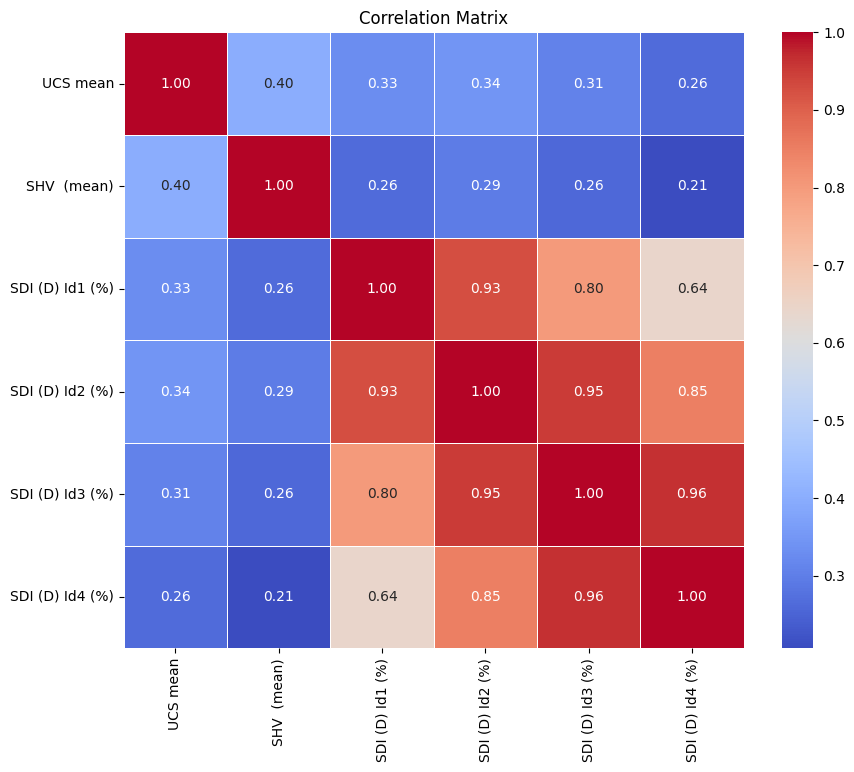

In [18]:
# Calculate and visualize the correlation matrix
correlation_matrix = d.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [19]:
d.columns

Index(['UCS mean', 'PLI ', 'ITS  mean', 'SHV  (mean)',
       '   SV (m/s)      mean (C)Vp', '   SV (m/s)      mean (C)Vs',
       'SDI (D) Id1 (%)', 'SDI (D) Id2 (%)', 'SDI (D) Id3 (%)',
       'SDI (D) Id4 (%)'],
      dtype='object')

In [20]:
# Selecting columns for clustering
columns_for_clustering = ['UCS mean', 'PLI ', 'ITS  mean', 'SHV  (mean)',
       '   SV (m/s)      mean (C)Vp', '   SV (m/s)      mean (C)Vs',
       'SDI (D) Id1 (%)', 'SDI (D) Id2 (%)', 'SDI (D) Id3 (%)',
       'SDI (D) Id4 (%)']

In [21]:
# Selecting only the columns for clustering
data_for_clustering = d[columns_for_clustering]

### Applying standardization

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Standardize the data using z-score normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)
scaled_data

array([[-1.09590767, -0.42205582,  2.63219953, ...,  1.12299358,
         1.42288238,  1.53381106],
       [ 0.33997814, -0.34867526, -1.45998922, ...,  0.59639638,
         0.82175387,  0.96997285],
       [-0.03135269,  0.27505951,  0.21376563, ...,  0.43218865,
         0.6920987 ,  0.76284861],
       ...,
       [-1.09590767, -1.61448994, -1.45998922, ..., -3.19170609,
        -2.6317884 , -1.95853377],
       [-1.09590767, -1.61448994, -1.45998922, ..., -3.19170609,
        -2.6317884 , -1.95853377],
       [-1.09590767, -0.73392321, -1.06282705, ..., -3.19170609,
        -2.6317884 , -1.95853377]])

In [23]:
# Convert scaled_data array back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_for_clustering)
scaled_df.head()

,UCS mean,PLI,ITS mean,SHV (mean),SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%)
0,-1.095908,-0.422056,2.632200,-0.431022,0.982007,0.843519,0.846397,1.122994,1.422882,1.533811
1,0.339978,-0.348675,-1.459989,-2.063539,0.637887,0.786704,0.485536,0.596396,0.821754,0.969973
2,-0.031353,0.275060,0.213766,-2.063539,0.699504,0.779473,0.421855,0.432189,0.692099,0.762849
3,0.509164,0.164989,-0.162120,-2.063539,0.710993,0.746417,0.066301,0.154734,0.462255,0.711068
4,0.185074,0.201679,0.256319,-1.052934,0.866604,0.917896,-0.045142,0.234007,0.597804,0.820383


### Create Elbow method

In [24]:
# Find the optimal number of clusters (k) using the elbow method
inertia_values = []
k_values = range(1, 11)  # You can adjust the range based on your needs

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

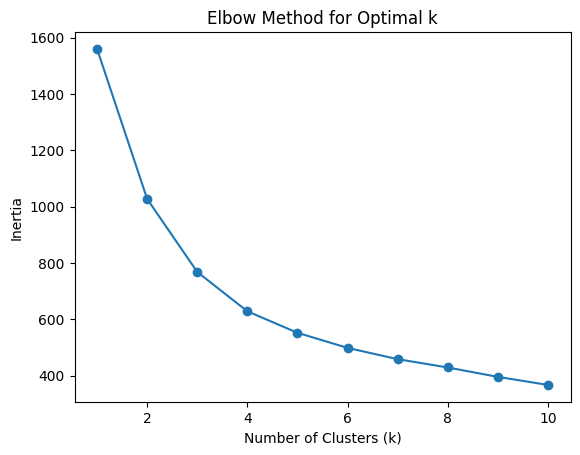

In [25]:
# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [26]:
n_clusters = 3

In [27]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
scaled_df['Cluster'] = kmeans.fit_predict(scaled_df)

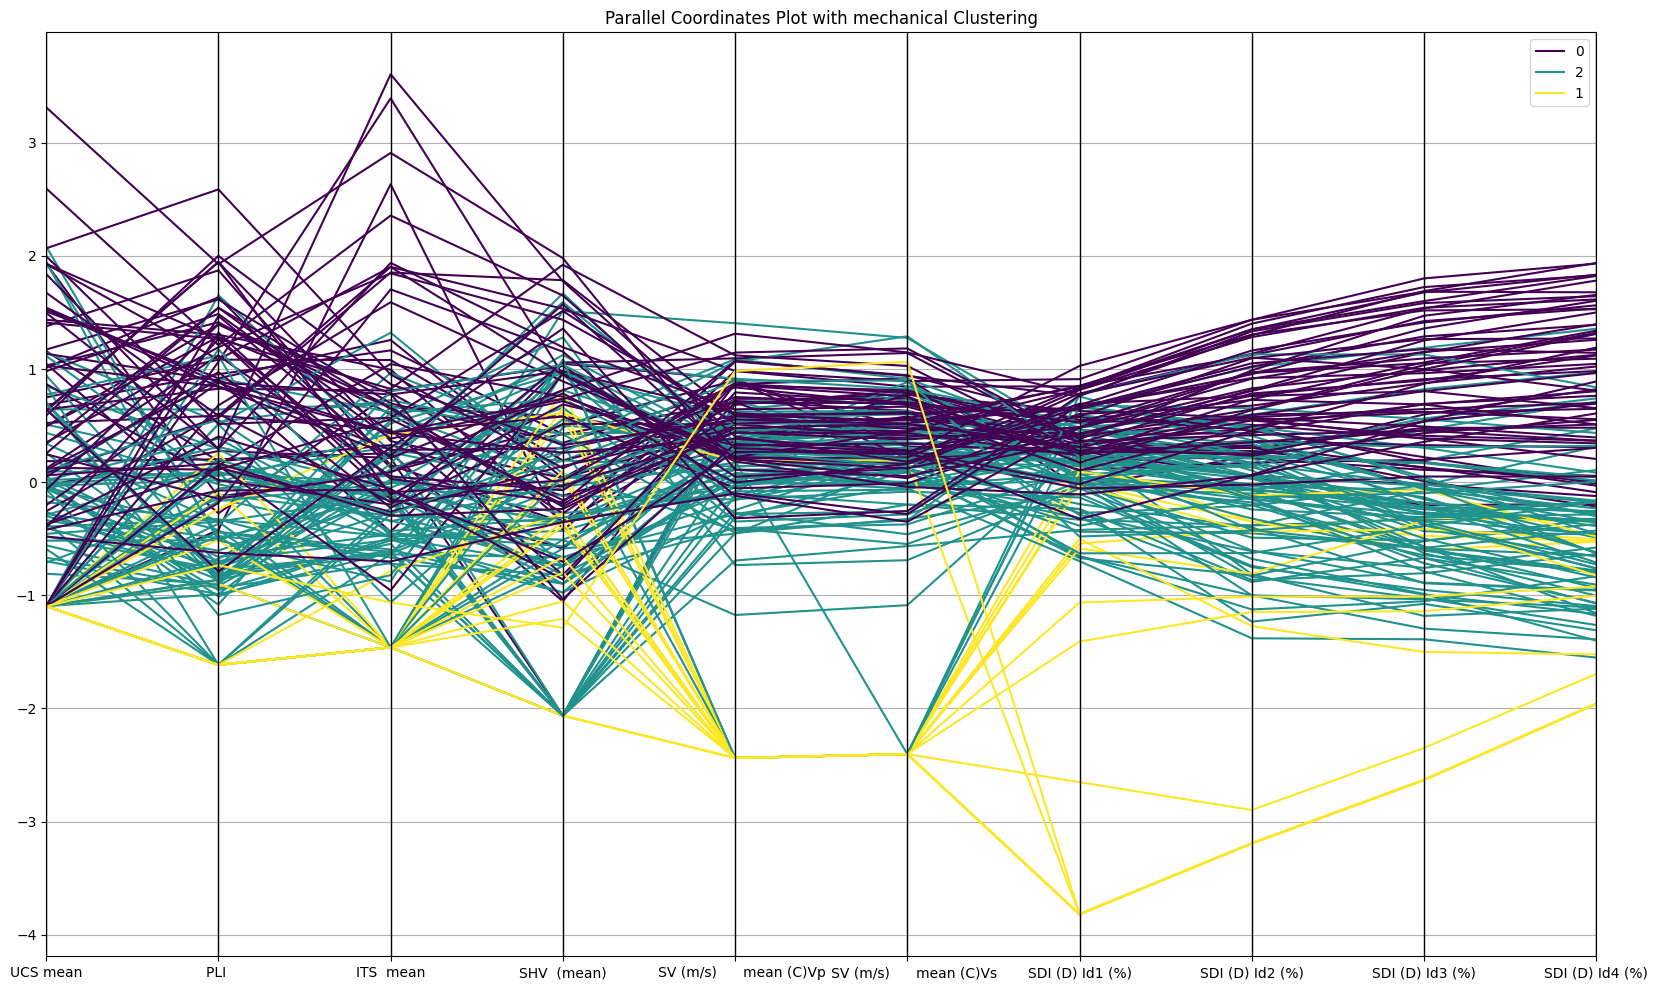

In [28]:
# Plotting
plt.figure(figsize=(20, 12))
pd.plotting.parallel_coordinates(scaled_df, 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot with mechanical Clustering')
plt.show()

### Adding GAD location

In [29]:
# Concatenating along rows (axis=0)
df2 = pd.concat([scaled_df, df['GAD']], axis=1)
df2.head()

,UCS mean,PLI,ITS mean,SHV (mean),SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),Cluster,GAD
0,-1.095908,-0.422056,2.632200,-0.431022,0.982007,0.843519,0.846397,1.122994,1.422882,1.533811,0,2
1,0.339978,-0.348675,-1.459989,-2.063539,0.637887,0.786704,0.485536,0.596396,0.821754,0.969973,2,5
2,-0.031353,0.275060,0.213766,-2.063539,0.699504,0.779473,0.421855,0.432189,0.692099,0.762849,0,5
3,0.509164,0.164989,-0.162120,-2.063539,0.710993,0.746417,0.066301,0.154734,0.462255,0.711068,2,5
4,0.185074,0.201679,0.256319,-1.052934,0.866604,0.917896,-0.045142,0.234007,0.597804,0.820383,0,5


In [30]:
df2 = df2.drop(['UCS mean', 'PLI ', 'ITS  mean', 'SHV  (mean)',
       '   SV (m/s)      mean (C)Vp', '   SV (m/s)      mean (C)Vs',
       'SDI (D) Id1 (%)', 'SDI (D) Id2 (%)', 'SDI (D) Id3 (%)',
       'SDI (D) Id4 (%)'], axis=1)
df2.head()

,Cluster,GAD
0,0,2
1,2,5
2,0,5
3,2,5
4,0,5


### Extract cluster 0 information

In [31]:
# Extract data points belonging to Cluster 1
cluster_0_data = df2[df2['Cluster'] == 0]
cluster_0_data

,Cluster,GAD
0,0,2
2,0,5
4,0,5
19,0,11
21,0,11
...,...,...
148,0,37
149,0,37
150,0,39
151,0,39


In [32]:
cluster_0_data.to_csv('mechanical cluster 0.csv', index=True)

### Extract cluster 1 information

In [33]:
# Extract data points belonging to Cluster 1
cluster_1_data = df2[df2['Cluster'] == 1]
cluster_1_data

,Cluster,GAD
10,1,8
13,1,8
14,1,8
45,1,11
70,1,12
72,1,12
75,1,13
81,1,13
88,1,14
94,1,20


In [34]:
cluster_1_data.to_csv('mechanical cluster 1.csv', index=True)

### Extract cluster 2 information

In [35]:
# Extract data points belonging to Cluster 1
cluster_2_data = df2[df2['Cluster'] == 2]
cluster_2_data

,Cluster,GAD
1,2,5
3,2,5
5,2,5
6,2,5
7,2,6
...,...,...
120,2,27
123,2,30
124,2,30
125,2,30


In [36]:
cluster_2_data.to_csv('mechanical cluster 2.csv', index=True)